In [3]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import scipy
import matplotlib
from matplotlib import pyplot as plt
plt.style.use('seaborn-paper')

### Read Data Set, and obtain PDF from CDF

In [4]:
# Read CDF
df_cdf = pd.read_csv('fico_cdf.csv')
df_cdf

,Score,Non- Hispanic white,Black,Hispanic,Asian
0,0.0,0.01,0.07,0.01,0.00
1,0.5,0.26,1.19,0.47,0.13
2,1.0,1.16,5.33,2.22,0.88
3,1.5,1.43,6.47,2.74,1.07
4,2.0,1.80,7.89,3.49,1.32
...,...,...,...,...,...
193,98.0,98.94,99.89,99.66,98.94
194,98.5,99.62,99.95,99.88,99.61
195,99.0,99.91,99.99,99.98,99.89
196,99.5,99.98,100.00,100.00,99.94


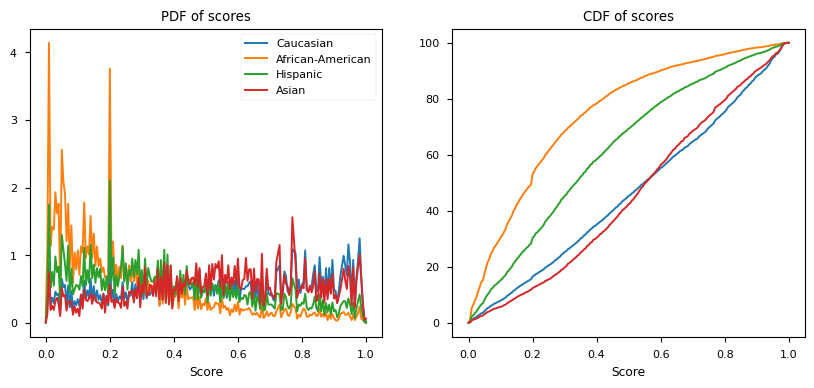

In [5]:
nrow, ncol = df_cdf.shape
df_cdf = df_cdf.rename(columns={"Non- Hispanic white": "Caucasian", "Black": "African-American", "Hispanic":"Hispanic", "Asian":"Asian"})
df_pdf = df_cdf.copy()
for i in range(nrow-1):
    indx = i + 1
    df_pdf.iloc[i+1,1:] = df_cdf.iloc[i+1,1:]- df_cdf.iloc[i,1:]
fig = plt.figure(figsize=(10,4))  
plt.subplot(1,2,1)
plt.plot(df_pdf["Score"]/100,df_pdf['Caucasian'],label='Caucasian')
plt.plot(df_pdf["Score"]/100,df_pdf['African-American'],label='African-American')
plt.plot(df_pdf["Score"]/100,df_pdf['Hispanic'],label='Hispanic')
plt.plot(df_pdf["Score"]/100,df_pdf['Asian'],label='Asian')
plt.xlabel('Score')
plt.title("PDF of scores")
plt.legend()
plt.subplot(1,2,2)
plt.plot(df_cdf["Score"]/100,df_cdf['Caucasian'],label='Caucasian')
plt.plot(df_cdf["Score"]/100,df_cdf['African-American'],label='African-American')
plt.plot(df_cdf["Score"]/100,df_cdf['Hispanic'],label='Hispanic')
plt.plot(df_cdf["Score"]/100,df_cdf['Asian'],label='Asian')
plt.xlabel('Score')
plt.title("CDF of scores")
#fig.savefig('pdf_cdf.eps', bbox_inches='tight')
plt.show()

#### Simulate Samples and fit distribution

In [6]:
np.random.seed(777)
# Step 1
NUM_SAMPLES = 100000
elements = df_pdf["Score"]/100
probabilities_c = df_pdf["Caucasian"]/100
probabilities_aa = df_pdf["African-American"]/100
probabilities_h = df_pdf["Hispanic"]/100
probabilities_a = df_pdf["Asian"]/100

scores_c = np.random.choice(elements, NUM_SAMPLES, p=probabilities_c)
scores_aa = np.random.choice(elements, NUM_SAMPLES, p=probabilities_aa)
scores_h = np.random.choice(elements, NUM_SAMPLES, p=probabilities_h)
scores_a = np.random.choice(elements, NUM_SAMPLES, p=probabilities_a)

In [7]:
from scipy.stats import beta
a_c,b_c,loc_c,scale_c = beta.fit(scores_c)
a_aa,b_aa,loc_aa,scale_aa = beta.fit(scores_aa)
a_h,b_h,loc_h,scale_h = beta.fit(scores_h)
a_a,b_a,loc_a,scale_a = beta.fit(scores_a)
print(a_c,b_c,loc_c,scale_c)
print(a_aa,b_aa,loc_aa,scale_aa)
print(a_h,b_h,loc_h,scale_h)
print(a_a,b_a,loc_a,scale_a)

1.1117417816764883 0.9698817311248905 -0.00022637702146016323 1.0002263770214603
0.9066054362932113 3.843627904351229 -2.1263182596306406e-30 1.352218471675902
0.9885338769360587 1.579156705506868 -1.0990236712659648e-26 1.011036949940605
1.3452256648646026 1.1299977406214774 0.00012418291418325888 0.999973061173576


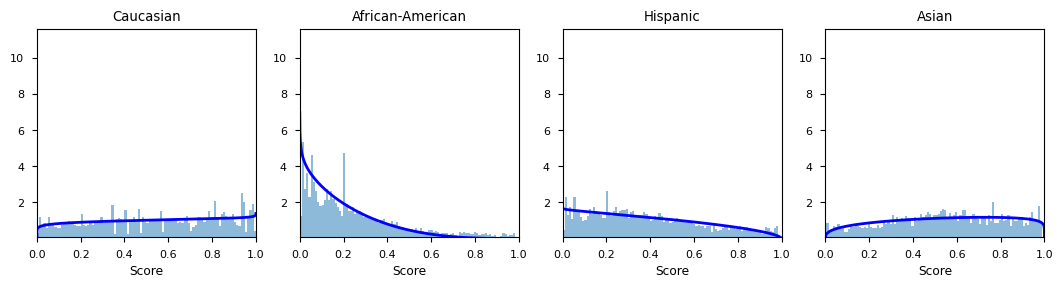

In [6]:
def plot_beta(x_range, a, b, mu=0, sigma=1, cdf=False, **kwargs):
    '''
    Plots the f distribution function for a given x range, a and b
    If mu and sigma are not provided, standard beta is plotted
    If cdf=True cumulative distribution is plotted
    Passes any keyword arguments to matplotlib plot function
    '''
    x = x_range
    if cdf:
        y = beta.cdf(x, a, b, mu, sigma)
    else:
        y = beta.pdf(x, a, b, mu, sigma)
    plt.plot(x, y, **kwargs)

x = np.linspace(0, 1, 5000)
fig = plt.figure(figsize=(13, 2.7))
plt.subplot(1,4,1)
plt.ylim(0.1, 11.6)
plt.xlim(0, 1)
plot_beta(x, a_c,b_c, 0, 1, color='blue', lw=2, ls='-')
plt.hist(scores_c, density=True, bins=100,alpha=0.5)
plt.title("Caucasian")
plt.xlabel('Score')
plt.subplot(1,4,2)
plt.ylim(0.1, 11.6)
plt.xlim(0, 1)
plot_beta(x, a_aa,b_aa, 0, 1, color='blue', lw=2, ls='-')
plt.hist(scores_aa, density=True, bins=100,alpha=0.5)
plt.title("African-American")
plt.xlabel('Score')
plt.subplot(1,4,3)
plt.ylim(0.1, 11.6)
plt.xlim(0, 1)
plot_beta(x, a_h,b_h, 0, 1, color='blue', lw=2, ls='-')
plt.hist(scores_h, density=True, bins=100,alpha=0.5)
plt.title("Hispanic")
plt.xlabel('Score')
plt.subplot(1,4,4)
plt.ylim(0.1, 11.6)
plt.xlim(0, 1)
plot_beta(x, a_a,b_a, 0, 1, color='blue', lw=2, ls='-')
plt.hist(scores_a, density=True, bins=100,alpha=0.5)
plt.title("Asian")
plt.xlabel('Score')
# fig.savefig('score_pdf.eps', bbox_inches='tight')
plt.show()

### For each group, Varying r and ploting:

1. the optimal strategic threshold vs nonstratgegic threshold

2. the optimal percentage of qualified people

It is reasonable to varying r from 0 to 0.3 to see the threshold change

In [8]:
threshold = 0.316364

def compute_decision_benefit_strategic(r, theta,a,b,loc,scale):
    # lower bound for improvement to begin
    if theta == 0 or theta == 1:
        xstar = theta
    else:
        xstar = (1 + (1/theta**(2)-1) * np.exp(2*threshold/np.log(1+r)))**(-0.5)

    result = integrate.quad(lambda x: (theta-x)*beta.pdf(x,a,b,loc,scale), xstar, theta)[0]
    return result

In [ ]:
compute_decision_benefit_strategic(0.3, 0.5,  a = a_c, b = b_c, loc = loc_c, scale = scale_c)

In [9]:
def produce_threshold_dataframe(r_list, maximize_func, a = a_c, b = b_c, loc = loc_c, scale = scale_c):
    best_threshold = {'r':[],'optimal theta':[],'optimal utility':[]}
    for r in r_list:
        print('finished')
        theta = np.linspace(0.0001,1,100)
        benefit = maximize_func(r,theta, a, b, loc, scale)
        df = pd.DataFrame({'theta':theta, 'benefit':benefit})
        max_benefit = df.max()['benefit']
        max_theta = df[df['benefit'] == max_benefit]['theta'].item()
        min_improve = (1 + (1/max_theta**(2)-1) * np.exp(2*threshold/np.log(1+r)))**(-0.5)
        best_threshold['r'].append(r)
        best_threshold['optimal theta'].append(max_theta)
        best_threshold['optimal utility'].append(max_benefit)
    print('whole finished')
    return pd.DataFrame(best_threshold)

In [ ]:
import scipy.integrate as integrate
from scipy.stats import uniform, beta
r_list = np.linspace(0,0.3,7)
r_list = r_list[1:]
compute_decision_benefit_strategic = np.vectorize(compute_decision_benefit_strategic, excluded=['r','a','b','loc','scale'])
fico_res_c = produce_threshold_dataframe(r_list, maximize_func = compute_decision_benefit_strategic)
fico_res_aa = produce_threshold_dataframe(r_list, compute_decision_benefit_strategic, a_aa, b_aa, loc_aa, scale_aa)
fico_res_h = produce_threshold_dataframe(r_list, compute_decision_benefit_strategic, a_h, b_h, loc_h, scale_h)
fico_res_a = produce_threshold_dataframe(r_list, compute_decision_benefit_strategic, a_a, b_a, loc_a, scale_a)

In [11]:
fico_res_c.to_csv('fico_res_c.csv')
fico_res_aa.to_csv('fico_res_aa.csv')
fico_res_a.to_csv('fico_res_a.csv')
fico_res_h.to_csv('fico_res_h.csv')
fico_res_c

,r,optimal theta,optimal utility
0,0.05,0.9899,0.449736
1,0.10,0.9495,0.343464
2,0.15,0.8990,0.236741
3,0.20,0.8485,0.166685
4,0.25,0.8182,0.122634
5,0.30,0.7879,0.093969


### Plot the percentage of each group who manipulates under the nonstrategic/strategic optimal threshold

In [12]:
def get_manipulation_percentage(theta_list, r_list, prob = [0.15,0.3,0.45,0.6],a = a_c, b = b_c, loc = loc_c, scale = scale_c ):
    final_res = {}
    for p in prob:
        manip_res = {'r':[],'optimal theta':[],'manipulation percentage':[]}
        for i in range(len(theta_list)):
            theta = theta_list[i]
            r = r_list[i]
            x = np.linspace(0,theta,1000)
            A = -np.log(np.sqrt((1/theta**2-1)/(1/x**2-1)))*np.log(1+r)
            T = -np.log(np.sqrt((1/theta**2-1)/(1/x**2-1)))/np.log(2)
            manip_res['r'].append(np.round(r,2))
            manip_res['optimal theta'].append(np.round(theta,2))
            y1 = (1-p) * 1/(1+r)**T - (theta - x)
            y2 = np.zeros(1000)
            i = 0
            for A_value in A:
                func = lambda tau: -np.exp(-A_value/tau) + np.exp(tau) - 1
                res = scipy.optimize.minimize_scalar(func, bounds= [0,1], method='bounded')
                y2[i] = max(-func(res.x),0)
                i += 1
            df = pd.DataFrame({'x0': x, 'net': y1-y2})
            if(len(df[df['net'] >= 0]) == 0):
                manip_res['manipulation percentage'].append(0)
            else:
                left = df[df['net']>0].iloc[0]['x0']
                right = df[df['net']>0].iloc[-1]['x0']
#                 print('r = %f, theta = %f, left-right = %f'%(r,theta,right-left))
                percentage = (beta.cdf(right,a,b,loc,scale) - beta.cdf(left,a,b,loc,scale))/beta.cdf(theta,a,b,loc,scale)
                manip_res['manipulation percentage'].append(np.round(100*percentage,4))
        if p not in final_res.keys():
            final_res[p] = manip_res
        print('finished')
    return final_res

In [ ]:
theta_list = fico_res_c['optimal theta']
r_list = fico_res_c['r']
manip_result_c = get_manipulation_percentage(theta_list, r_list, [0.1,0.3,0.5], a_c, b_c, loc_c, scale_c)
theta_list = fico_res_aa['optimal theta']
r_list = fico_res_aa['r']
manip_result_aa = get_manipulation_percentage(theta_list, r_list, [0.1,0.3,0.5], a_aa, b_aa, loc_aa, scale_aa)
theta_list = fico_res_h['optimal theta']
r_list = fico_res_h['r']
manip_result_h = get_manipulation_percentage(theta_list, r_list, [0.1,0.3,0.5], a_h, b_h, loc_h, scale_h)
theta_list = fico_res_a['optimal theta']
r_list = fico_res_a['r']
manip_result_a = get_manipulation_percentage(theta_list, r_list, [0.1,0.3,0.5], a_a, b_a, loc_a, scale_a)

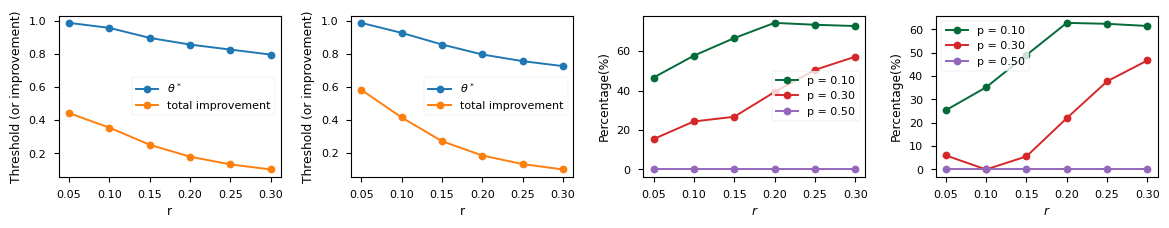

In [14]:
matplotlib.rcParams.update({'font.size': 20.7})
colors = ["C0", "C1"]
styles = ['-', "--"]
fig, axes = plt.subplots(1, 4, figsize = (12,2.5))
fig.tight_layout()


axes[0].plot(fico_res_a['r'], fico_res_a['optimal theta'], marker='o', color = colors[0], linestyle = styles[0], label = r'$\theta^*$')
axes[0].set_xlabel('r')
axes[0].set_ylabel('Threshold (or improvement)')
axes[0].plot(fico_res_a['r'], fico_res_a['optimal utility'], marker='o',color = colors[1], linestyle = styles[0], label = 'total improvement')
axes[0].legend()

axes[1].plot(fico_res_h['r'], fico_res_h['optimal theta'], marker='o', color = colors[0], linestyle = styles[0], label = r'$\theta^*$')
axes[1].set_xlabel('r')
axes[1].set_ylabel('Threshold (or improvement)')
axes[1].plot(fico_res_h['r'], fico_res_h['optimal utility'], marker='o',color = colors[1], linestyle = styles[0], label = 'total improvement')
axes[1].legend()

prob = [0.1,0.3,0.5]
color = ['#046a38', '#d62728', '#9467bd']
i = 0
for p in prob:
    target1 = manip_result_a[p]
    axes[2].plot(target1['r'], target1['manipulation percentage'], marker='o', label = 'p = %.2f'%p, color = color[i])
    axes[2].set_xlabel(r'$r$')
    axes[2].set_ylabel('Percentage(%)')
    axes[2].legend()
    i += 1
i=0
for p in prob:
    target1 = manip_result_h[p]
    axes[3].plot(target1['r'], target1['manipulation percentage'], marker='o', label = 'p = %.2f'%p, color = color[i])
    axes[3].set_xlabel(r'$r$')
    axes[3].set_ylabel('Percentage(%)')
    axes[3].legend()
    i += 1

fig.savefig('result_ah.pdf')

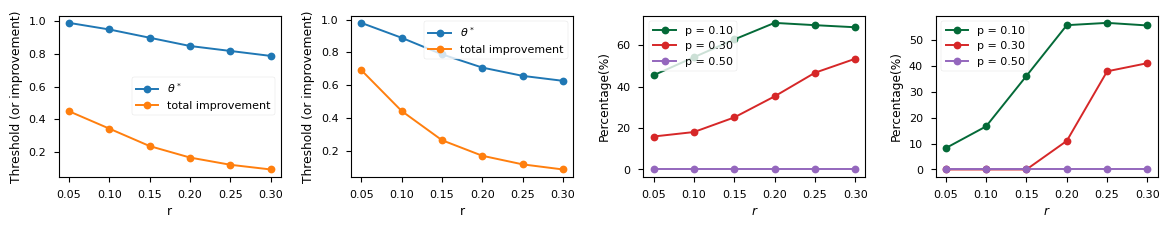

In [15]:
matplotlib.rcParams.update({'font.size': 20.7})
colors = ["C0", "C1"]
styles = ['-', "--"]
fig, axes = plt.subplots(1, 4, figsize = (12,2.5))
fig.tight_layout()


axes[0].plot(fico_res_c['r'], fico_res_c['optimal theta'], marker='o', color = colors[0], linestyle = styles[0], label = r'$\theta^*$')
axes[0].set_xlabel('r')
axes[0].set_ylabel('Threshold (or improvement)')
axes[0].plot(fico_res_c['r'], fico_res_c['optimal utility'], marker='o',color = colors[1], linestyle = styles[0], label = 'total improvement')
axes[0].legend()

axes[1].plot(fico_res_aa['r'], fico_res_aa['optimal theta'], marker='o', color = colors[0], linestyle = styles[0], label = r'$\theta^*$')
axes[1].set_xlabel('r')
axes[1].set_ylabel('Threshold (or improvement)')
axes[1].plot(fico_res_aa['r'], fico_res_aa['optimal utility'], marker='o',color = colors[1], linestyle = styles[0], label = 'total improvement')
axes[1].legend()

prob = [0.1,0.3,0.5]
color = ['#046a38', '#d62728', '#9467bd']
i = 0
for p in prob:
    target1 = manip_result_c[p]
    axes[2].plot(target1['r'], target1['manipulation percentage'], marker='o', label = 'p = %.2f'%p, color = color[i])
    axes[2].set_xlabel(r'$r$')
    axes[2].set_ylabel('Percentage(%)')
    axes[2].legend()
    i += 1
i=0
for p in prob:
    target1 = manip_result_aa[p]
    axes[3].plot(target1['r'], target1['manipulation percentage'], marker='o', label = 'p = %.2f'%p, color = color[i])
    axes[3].set_xlabel(r'$r$')
    axes[3].set_ylabel('Percentage(%)')
    axes[3].legend()
    i += 1

fig.savefig('result_ca.pdf')